In [1]:
import pyreadr
import pandas as pd
import numpy as np

In [2]:
df = pyreadr.read_r('./data/gss16.rda')
gss16_data = df['gss16']

In [3]:
gss16_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   harass5   1469 non-null   object 
 1   emailmin  1649 non-null   float64
 2   emailhr   1649 non-null   float64
 3   educ      2858 non-null   float64
 4   polviews  2756 non-null   object 
 5   advfront  1385 non-null   object 
 6   snapchat  1372 non-null   object 
 7   instagrm  1372 non-null   object 
 8   wrkstat   2864 non-null   object 
dtypes: float64(3), object(6)
memory usage: 201.7+ KB


In [4]:
gss16_data.head()

,harass5,emailmin,emailhr,educ,polviews,advfront,snapchat,instagrm,wrkstat
0,NaN,0.0,12.0,16.0,Moderate,Strongly agree,NaN,NaN,Working fulltime
1,NaN,30.0,0.0,12.0,Liberal,Disagree,No,No,Working fulltime
2,No,NaN,NaN,16.0,Conservative,NaN,No,No,Retired
3,NaN,10.0,0.0,12.0,Moderate,Disagree,NaN,NaN,Working parttime
4,No,NaN,NaN,18.0,Slightly liberal,NaN,Yes,Yes,Working parttime


In [5]:
gss16_data.dropna(subset=['emailmin', 'emailhr'], inplace=True)
gss16_data['educ'].fillna(gss16_data['educ'].mean(), inplace = True)

In [6]:
col_num = ['emailmin', 'emailhr', 'educ']
col_cat = ['harass5', 'polviews', 'advfront', 'snapchat', 'instagrm', 'wrkstat']

In [7]:
df_cat = gss16_data[gss16_data.columns.intersection(col_cat)]
df_num = gss16_data[gss16_data.columns.intersection(col_num)]

In [8]:
print(df_cat.info())
print(df_num.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2865
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   harass5   431 non-null    object
 1   polviews  1594 non-null   object
 2   advfront  1216 non-null   object
 3   snapchat  680 non-null    object
 4   instagrm  680 non-null    object
 5   wrkstat   1648 non-null   object
dtypes: object(6)
memory usage: 90.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2865
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   emailmin  1649 non-null   float64
 1   emailhr   1649 non-null   float64
 2   educ      1649 non-null   float64
dtypes: float64(3)
memory usage: 51.5 KB
None


In [9]:
df_num['email_time'] = df_num['emailhr'] * 60 + df_num['emailmin']

max_email_time = df_num['email_time'].max()
min_email_time = df_num['email_time'].min()
df_num['email_time_center'] = (df_num['email_time'] - min_email_time) / (max_email_time - min_email_time)

/tmp/ipykernel_29026/1697783655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['email_time'] = df_num['emailhr'] * 60 + df_num['emailmin']
/tmp/ipykernel_29026/1697783655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['email_time_center'] = (df_num['email_time'] - min_email_time) / (max_email_time - min_email_time)


In [10]:
df_num['email_time_center']

0       0.120000
1       0.005000
3       0.001667
5       0.020000
6       0.400000
          ...   
2860    0.010000
2862    0.200000
2863    0.020000
2864    0.000000
2865    0.010000
Name: email_time_center, Length: 1649, dtype: float64

In [11]:
max_educ = df_num['educ'].max()
min_educ = df_num['educ'].min()
df_num['educ_center'] = (df_num['educ'] - min_educ) / (max_educ - min_educ)

/tmp/ipykernel_29026/2774885650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['educ_center'] = (df_num['educ'] - min_educ) / (max_educ - min_educ)


In [12]:
df_num['educ_center']

0       0.777778
1       0.555556
3       0.555556
5       0.666667
6       0.666667
          ...   
2860    0.611111
2862    1.000000
2863    0.722222
2864    0.666667
2865    0.666667
Name: educ_center, Length: 1649, dtype: float64

In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2865
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   emailmin           1649 non-null   float64
 1   emailhr            1649 non-null   float64
 2   educ               1649 non-null   float64
 3   email_time         1649 non-null   float64
 4   email_time_center  1649 non-null   float64
 5   educ_center        1649 non-null   float64
dtypes: float64(6)
memory usage: 90.2 KB


In [14]:
df_num.to_csv('./data/preprocessing/gss16_number_columns', index=False)

In [15]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

In [16]:
# enc = OneHotEncoder(handle_unknown='ignore')

In [17]:
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [18]:
# df_trans = ohe.fit_transform(gss16_data[['harass5', 'polviews', 'advfront', 'snapchat', 'instagrm', 'wrkstat']])

In [19]:
# ohe.categories_

In [20]:
# np.argwhere(np.isnan(df_trans))

In [21]:
df_cat_dum = pd.get_dummies(df_cat, dtype=int)

In [22]:
df_cat_dum.head()

,harass5_Does not apply (i do not have a job/superior/co-worker),harass5_No,harass5_Yes,polviews_Conservative,polviews_Extremely liberal,polviews_Extrmly conservative,polviews_Liberal,polviews_Moderate,polviews_Slghtly conservative,polviews_Slightly liberal,...,instagrm_No,instagrm_Yes,wrkstat_Keeping house,wrkstat_Other,wrkstat_Retired,wrkstat_School,wrkstat_Temp not working,"wrkstat_Unempl, laid off",wrkstat_Working fulltime,wrkstat_Working parttime
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df_cat_dum.to_csv('./data/preprocessing/gss16_dummies_column', index=False)

In [24]:
X = pd.concat([df_num['educ_center'], df_cat_dum], axis=1)
y = df_num['email_time_center']

In [25]:
X.head()

,educ_center,harass5_Does not apply (i do not have a job/superior/co-worker),harass5_No,harass5_Yes,polviews_Conservative,polviews_Extremely liberal,polviews_Extrmly conservative,polviews_Liberal,polviews_Moderate,polviews_Slghtly conservative,...,instagrm_No,instagrm_Yes,wrkstat_Keeping house,wrkstat_Other,wrkstat_Retired,wrkstat_School,wrkstat_Temp not working,"wrkstat_Unempl, laid off",wrkstat_Working fulltime,wrkstat_Working parttime
0,0.777778,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.555556,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.555556,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0.666667,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
6,0.666667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
X.to_csv('./data/preprocessing/X.csv', index=False)
y.to_csv('./data/preprocessing/y.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,educ_center,harass5_Does not apply (i do not have a job/superior/co-worker),harass5_No,harass5_Yes,polviews_Conservative,polviews_Extremely liberal,polviews_Extrmly conservative,polviews_Liberal,polviews_Moderate,polviews_Slghtly conservative,...,instagrm_No,instagrm_Yes,wrkstat_Keeping house,wrkstat_Other,wrkstat_Retired,wrkstat_School,wrkstat_Temp not working,"wrkstat_Unempl, laid off",wrkstat_Working fulltime,wrkstat_Working parttime
1009,1.000000,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
123,0.555556,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2061,0.611111,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2855,0.722222,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2544,0.722222,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [29]:
y_train.head()

1009    0.0500
123     0.5000
2061    0.0100
2855    0.0500
2544    0.0025
Name: email_time_center, dtype: float64

<Axes: >

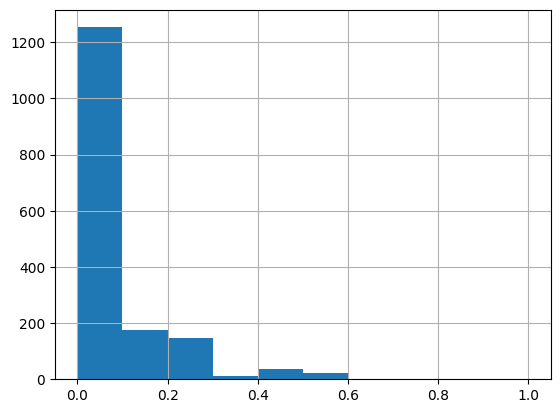

In [30]:
y.hist()

In [31]:
import statsmodels.api as sm

gamma_model = sm.GLM(y_train, X_train, family=sm.families.Gamma())

/home/binh/VSCode/social-stat-final-term/.venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [32]:
gamma_results = gamma_model.fit(method='lbfgs')

/home/binh/VSCode/social-stat-final-term/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [33]:
gamma_results.summary()

/home/binh/VSCode/social-stat-final-term/.venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1806: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      email_time_center   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1292
Model Family:                   Gamma   Df Model:                           26
Link Function:           InversePower   Scale:                          3.2215
Method:                         lbfgs   Log-Likelihood:                    inf
Date:                Wed, 09 Aug 2023   Deviance:                       14232.
Time:                        21:57:32   Pearson chi2:                 4.16e+03
No. Iterations:                    38   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
educ_center                                                       -21.9485      4.185     -5.245      0.000     -30.150     -13.747
harass5_Does not apply (i do not have a job/superior/co-worker)    53.9251     37.059      1.455      0.146     -18.709     126.559
harass5_No                                                         12.7650     13.857      0.921      0.357     -14.395      39.925
harass5_Yes                                                        12.8510     14.144      0.909      0.364     -14.871      40.573
polviews_Conservative                                               9.9666      2.087      4.775      0.000       5.876      14.058
polviews_Extremely liberal                                         12.6532      3.440      3.678      0.000       5.911      19.395
polviews_Extrmly conservative                                      26.5046      9.235      2.870      0.004       8.404      44.605
polviews_Liberal                                                   11.3744      2.271      5.009      0.000       6.924      15.825
polviews_Moderate                                                   9.5758      1.649      5.807      0.000       6.344      12.808
polviews_Slghtly conservative                                      10.6256      2.153      4.935      0.000       6.405      14.846
polviews_Slightly liberal                                           8.4631      2.031      4.166      0.000       4.482      12.444
advfront_Agree                                                     13.3601     13.838      0.965      0.334     -13.763      40.483
advfront_Disagree                                                  13.8545     13.765      1.006      0.314     -13.125      40.834
advfront_Dont know                                                 34.0277     26.930      1.264      0.206     -18.755      86.810
advfront_Strongly agree                                            12.8280     13.898      0.923      0.356     -14.411      40.067
advfront_Strongly disagree                                          6.5618     14.734      0.445      0.656     -22.317      35.440
snapchat_No                                                         0.6972        nan        nan        nan         nan         nan
snapchat_Yes                                                       -0.5994        nan        nan        nan         nan         nan
instagrm_No                                                         0.8786        nan        nan        nan         nan         nan
instagrm_Yes                                                       -0.7808        nan        nan        nan         nan         nan
wrkstat_Keeping house                          

In [34]:
y_pred = gamma_results.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f'mse: {mse}')

mse: 0.013808555753040774
